**Introduction:**

We have data about our customers of supermarket mall and their membership details like Customer ID, age, gender, annual income and spending score.

Problem Statement: We want to understand the customers like who can be easily converge to spend more.
Target: So that the sense can be given to marketing team and plan the strategy accordingly. 

In [2]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from pandas.plotting import scatter_matrix  # For scatter matrix plot
import os

In [16]:
cust = pd.read_csv('Mall_Customers.csv')

In [17]:
cust.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
#Missing values check
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Exploring the Data

#### Univariate Analysis

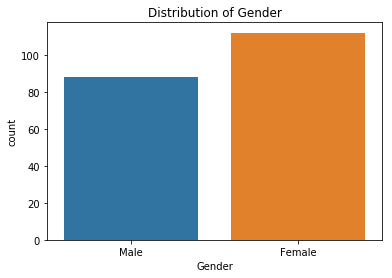

In [20]:
# Distribution of gender
sns.countplot(x='Gender', data=cust)
plt.title('Distribution of Gender')

**There are slightly more women than men in this data set.

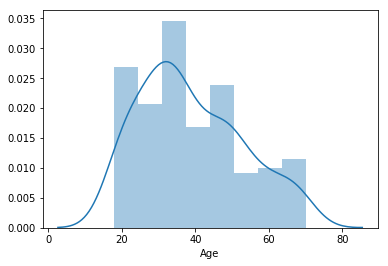

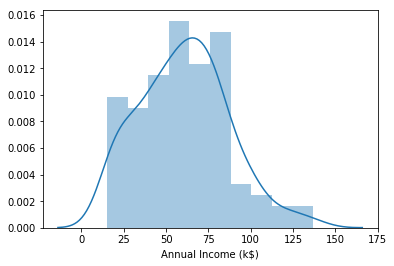

In [39]:
#Age and Annual Income Histograms

sns.distplot(cust['Age'], hist=True, kde=True)
plt.show()
sns.distplot(cust['Annual Income (k$)'], hist=True, kde=True)

**Mostly Customers of age between 20 and 50 and Income between 25k to 80K Dollars**

#### Bivariate Analysis

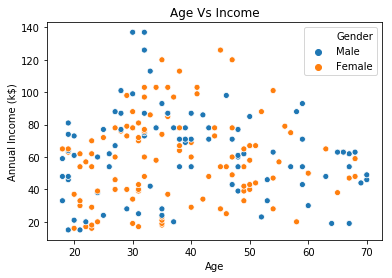

In [31]:
#Age Vs Annual Income on Gender

sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=cust)
plt.title('Age Vs Income')

**Insight : Not Much Relation between Age and Annual Income**



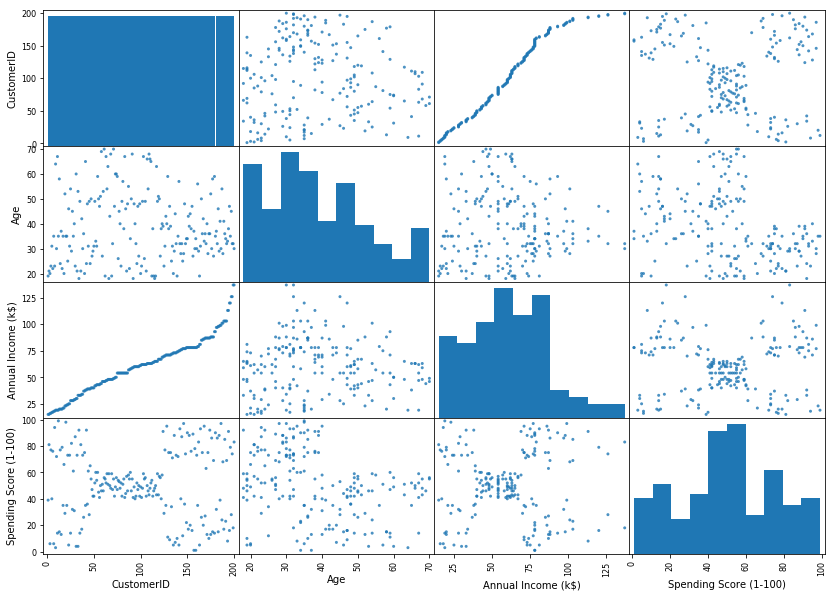

In [93]:
#Plotting par plots for better insights

scatter_matrix(cust,alpha=0.8,figsize=(14,10),diagonal='hist')
plt.show()

**Insights : We can see clusters for Income Vs Spending score and Age Vs Spending Score.**

Drawing them separtely and moving to Cluster Analysis for better insights

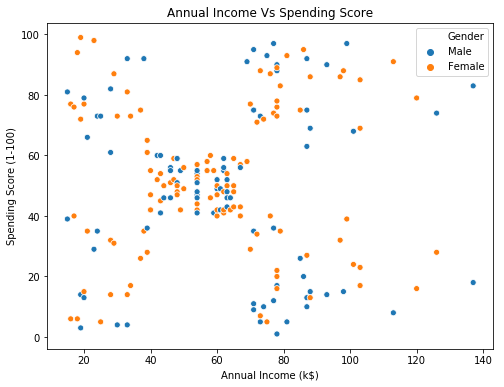

In [87]:
#Spedning Score and Annual Income
plt.figure(figsize=(8,6))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=cust)
plt.title('Annual Income Vs Spending Score')

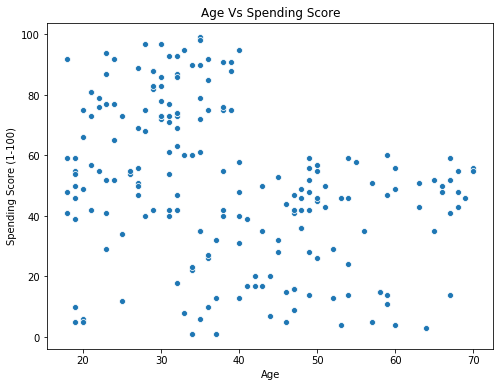

In [88]:
#Spedning Score and Annual Income
plt.figure(figsize=(8,6))
sns.scatterplot('Age', 'Spending Score (1-100)', data=cust)
plt.title('Age Vs Spending Score')

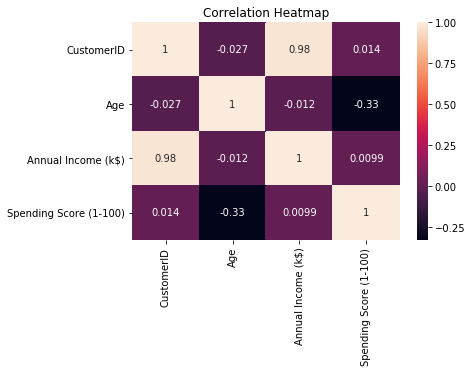

In [49]:
sns.heatmap(cust.corr(), annot=True)
plt.title('Correlation Heatmap')

## Annual income and Spending Score Clustering Analysis

In [45]:
#Annual income and Spending score
X= dataset.iloc[:, [3,4]].values

In [10]:
#Importing kmeans

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


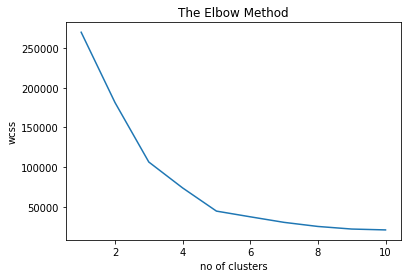

In [11]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [79]:
#Building Model
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
Y_kmeans= kmeansmodel.fit_predict(X)


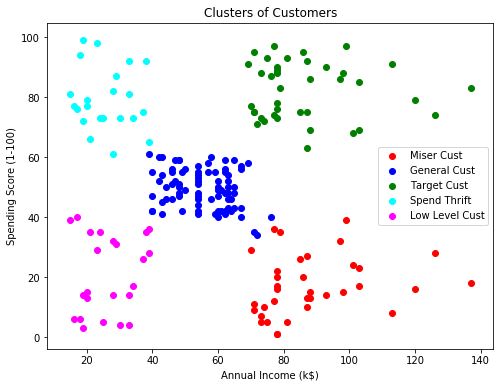

In [89]:
#Visualizing all the clusters 

plt.figure(figsize=(8,6))
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1],c = 'red', label = 'Miser Cust')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1],c = 'blue', label = 'General Cust')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1],c = 'green', label = 'Target Cust')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1],c = 'cyan', label = 'Spend Thrift')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1],c = 'magenta', label = 'Low Level Cust')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Conclusion**
- Cluster 1 Miser (Red Color) : Earn high but spend less
- Cluster 2 General (Blue Color) : Average in terms of earning and spending 
- Cluster 3 Target (Green Color) : Earning high and also spending high. **(Target Customers)**
- Cluster 4 Spend Thrift (Cyan Color) : Earning less but spending more. **(May be taking loan to spend lavishly.)**
- Cluster 5 Lower Segment (Pink Color) : Earn less as well as spend less

## Age and Spending score Cluster Analysis

In [48]:
x = cust.iloc[:, [2, 4]].values
x.shape

(200, 2)

In [90]:
#Building Model
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


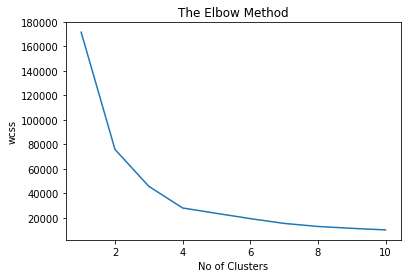

In [74]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)


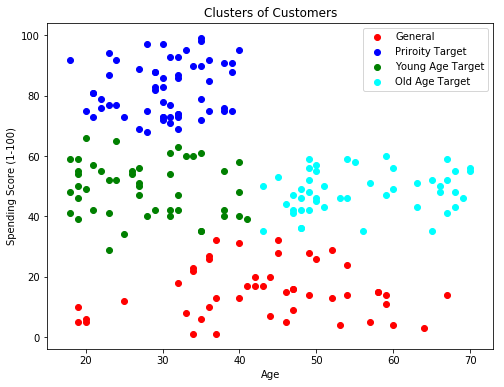

In [91]:
#Visualizing all the clusters 

plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],c = 'red', label = 'General')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],c = 'blue', label = 'Priroity Target')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],c = 'green', label = 'Young Age Target')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],c = 'cyan', label = 'Old Age Target')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Conclusion**
- Cluster 1 General (Red Color) : All age but spend less
- Cluster 2 Priority Target (Blue Color) : Young age and spend high. **(Priority Target)**
- Cluster 3 Young Age Target (Green Color) : Young age and spend average. **(Can be made Target)**
- Cluster 4 Old Age Target (Cyan Color) : Old and spend average. **(Can be made Target)**

## Agglomerative Clustering

In [94]:
#importing libraries
import sklearn
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [95]:
#Making object with name hclust
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [100]:
#Dropping categorical variable
cust=cust.drop(["Gender"],axis=1)
cust_scaled = cust.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [101]:
#using compalete linkage
Z = linkage(cust_scaled, 'complete')

In [102]:
hclust.fit(cust_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [103]:
cust['Groups'] = hclust.labels_
cust.Groups.value_counts()

2    61
0    55
3    39
1    38
4     7
Name: Groups, dtype: int64

In [104]:
#Analysing clsuters
cust.groupby(['Groups']).mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Groups,,,,
0,61.254545,25.963636,43.509091,61.945455
1,162.000000,40.394737,87.000000,18.631579
2,68.655738,54.426230,47.655738,41.770492
3,162.000000,32.692308,86.538462,82.128205
4,9.857143,30.285714,18.714286,24.857143


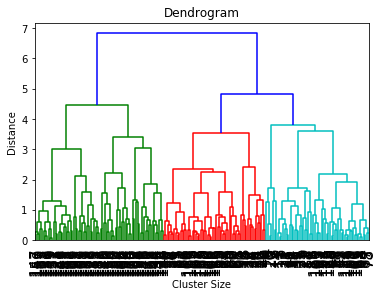

In [105]:
#Plotting Dendograms
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

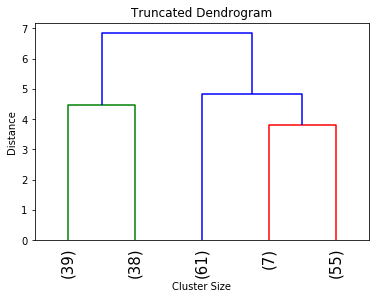

In [108]:
#Plotting Dendograms for 5 clusters for better visual understanding
dendrogram(Z,truncate_mode='lastp',p=5,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()